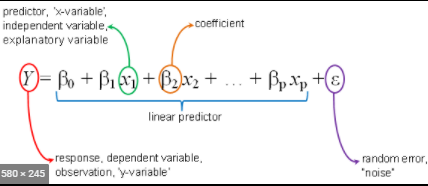

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
dataset =pd.read_csv("50_Startups.csv")
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### Dummy Variables

a gente não pode colocar as variaveis dummys ao mesmo tempo, pois gera colunas linearmente dependentes e atrapalha na predição (Trap Dummy Variables).
Solução, devemos omitir uma Dummy Variable

In [10]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(), [0])], remainder='passthrough')
dataset[["State1"]]=np.array(ct.fit_transform(dataset[["State"]]))

ValueError: Columns must be same length as key

In [ ]:
X=dataset.iloc[:,0:-1].values
y=dataset.iloc[:,-1].values